# Mushroom Classification



This project is about classifying mushrooms as edible or poisonous. 

In [92]:
# Import tools for machine learning.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn import linear_model, metrics, model_selection
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
!pip install seaborn
import seaborn as sns
from sklearn.model_selection import train_test_split

# DATA  DICTIONARY

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y

4. bruises?: bruises=t,no=f

5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s

6. gill-attachment: attached=a,descending=d,free=f,notched=n

7. gill-spacing: close=c,crowded=w,distant=d

8. gill-size: broad=b,narrow=n

9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y

10. stalk-shape: enlarging=e,tapering=t

11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?

12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

16. veil-type: partial=p,universal=u

17. veil-color: brown=n,orange=o,white=w,yellow=y

18. ring-number: none=n,one=o,two=t

19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z

20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y

21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y

22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

23. class: edible=e, poisonous=p

In [2]:
# Read the mushroom data from the CSV into a dataframe.
df = pd.read_csv("mushroom.csv")

In [93]:
# Preview the data
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0


In [94]:
# Show more information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 8124 non-null   int32
 1   cap-surface               8124 non-null   int32
 2   cap-color                 8124 non-null   int32
 3   bruises%3F                8124 non-null   int32
 4   odor                      8124 non-null   int32
 5   gill-attachment           8124 non-null   int32
 6   gill-spacing              8124 non-null   int32
 7   gill-size                 8124 non-null   int32
 8   gill-color                8124 non-null   int32
 9   stalk-shape               8124 non-null   int32
 10  stalk-root                8124 non-null   int32
 11  stalk-surface-above-ring  8124 non-null   int64
 12  stalk-surface-below-ring  8124 non-null   int32
 13  stalk-color-above-ring    8124 non-null   int32
 14  stalk-color-below-ring    8124 non-null 

The dataframe currently contains non-numeric values.  This creates issues when trying to convert the values into graphs. The data will need converted into numeric values using a Label Encoder.

In [95]:
# Create the Label Encoder
lr = LabelEncoder()

# Create an array to reference the column names.
col=["cap-shape","cap-surface","cap-color","bruises%3F","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","veil-type","veil-color","ring-number","ring-type","spore-print-color","population","habitat","class"]

# For each column, transform the data into a numerical value. 
for i in col:
    df[i] = lr.fit_transform(df[i])

In [96]:
# Show more information about the data to confirm the data type has changed. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 8124 non-null   int64
 1   cap-surface               8124 non-null   int64
 2   cap-color                 8124 non-null   int64
 3   bruises%3F                8124 non-null   int64
 4   odor                      8124 non-null   int64
 5   gill-attachment           8124 non-null   int64
 6   gill-spacing              8124 non-null   int64
 7   gill-size                 8124 non-null   int64
 8   gill-color                8124 non-null   int64
 9   stalk-shape               8124 non-null   int64
 10  stalk-root                8124 non-null   int64
 11  stalk-surface-above-ring  8124 non-null   int64
 12  stalk-surface-below-ring  8124 non-null   int64
 13  stalk-color-above-ring    8124 non-null   int64
 14  stalk-color-below-ring    8124 non-null 

In [97]:
# Preview the data again to confirm the data has been converted to numeric values.
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0


# Explore Data

In [98]:
# Count the values that represent the dependent variable.
# This will create a sum of each value for whether a mushroom is poisonous or edible.
df["class"].value_counts()

class
0    4208
1    3916
Name: count, dtype: int64

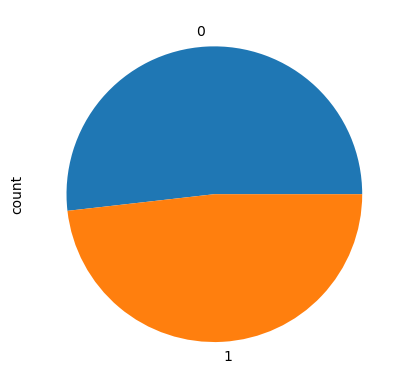

In [100]:
# Display data graphically
df["class"].value_counts().plot(kind="pie"); 

The pie chart above shows that there is nearly an even distribution between poisonous and edible mushrooms. Since we have an idea of how the dependent variable is distributed, we can also try to gather the same type of information for the independent variables or features of the data. 

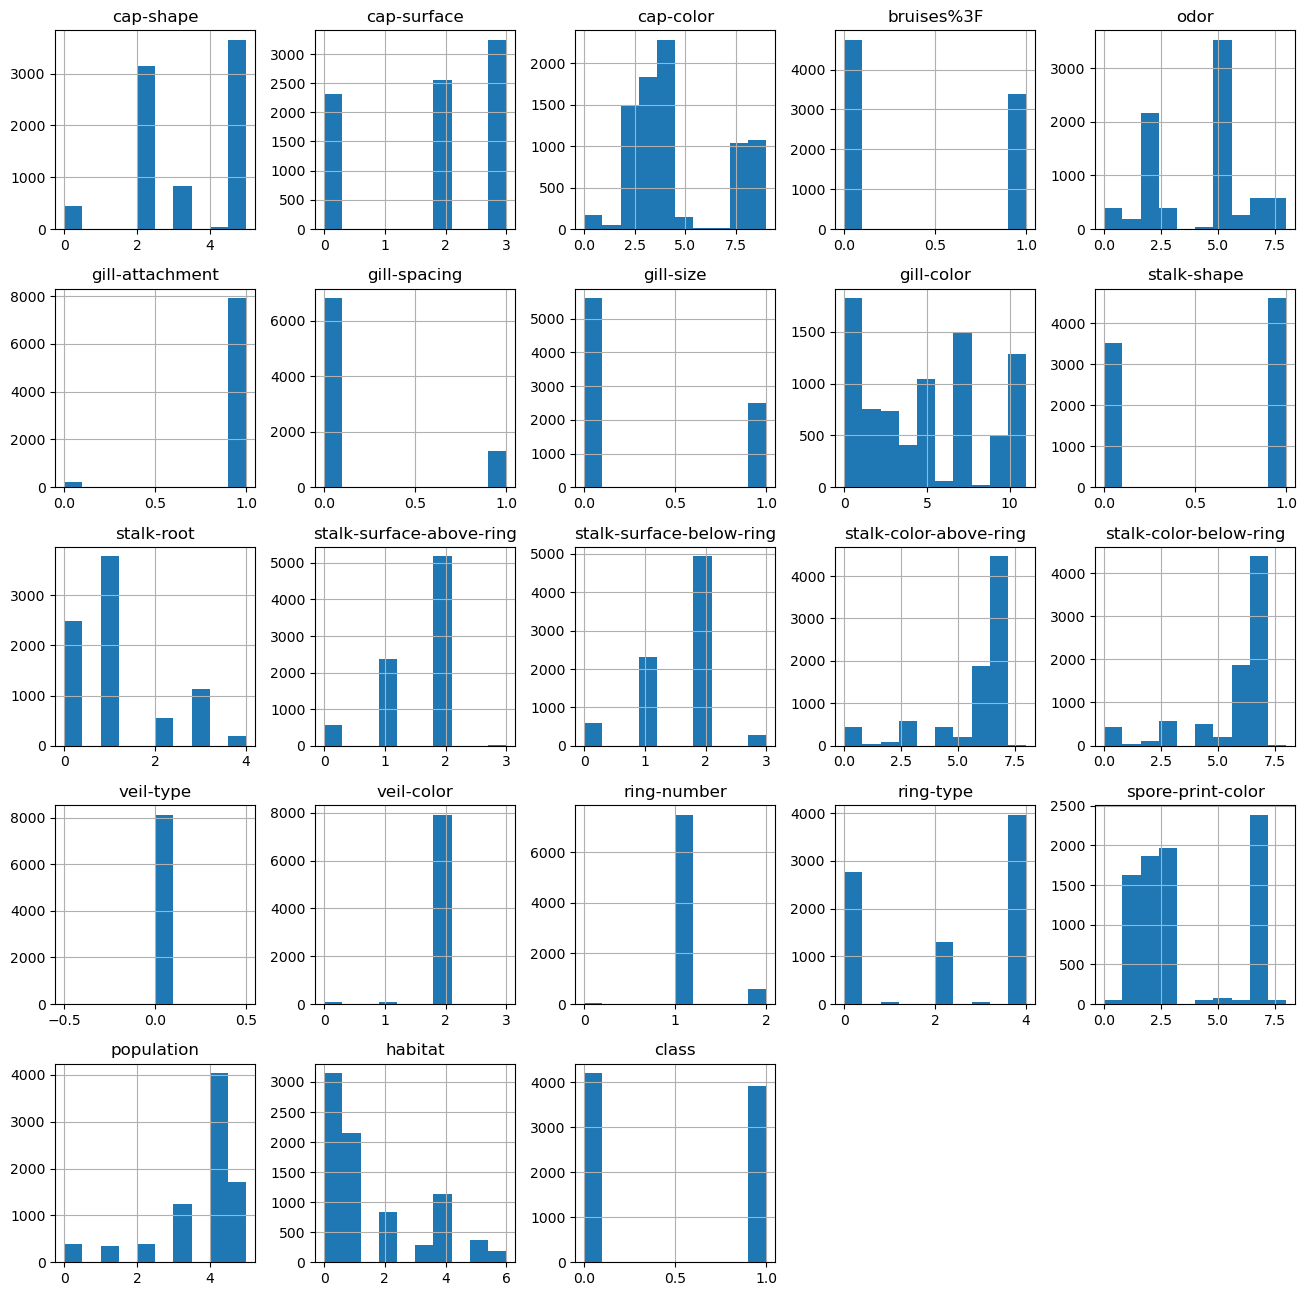

In [101]:
df.hist(figsize=(16,16));

The histogram above gives us a good idea at how varied each feature can be. Since the numbers only represent non-numeric values for each feature, there is not much we can do in terms of calculations with the current data shown. 

These graphs are good for showing us specific information about each feature, but it doesn't do much to show us information about the relationships between the features. For that, we will create a correlation matrix.

In [102]:
# Create a correlation matrix.
df.corr()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
cap-shape,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,...,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221,0.052951
cap-surface,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,...,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887,0.178446
cap-color,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,...,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925,-0.031384
bruises%3F,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,...,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095,-0.501530
odor,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,...,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610,-0.093552
gill-attachment,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,...,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304,0.129200
gill-spacing,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,...,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680,-0.348387
gill-size,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,...,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418,0.540024
gill-color,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,...,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972,-0.530566
stalk-shape,0.063794,-0.014123,-0.456496,0.099364,0.459766,0.186485,0.080895,0.214576,-0.175699,1.000000,...,0.223439,0.235794,NaN,0.162604,-0.293221,-0.291444,0.258831,0.087383,-0.269216,-0.102019


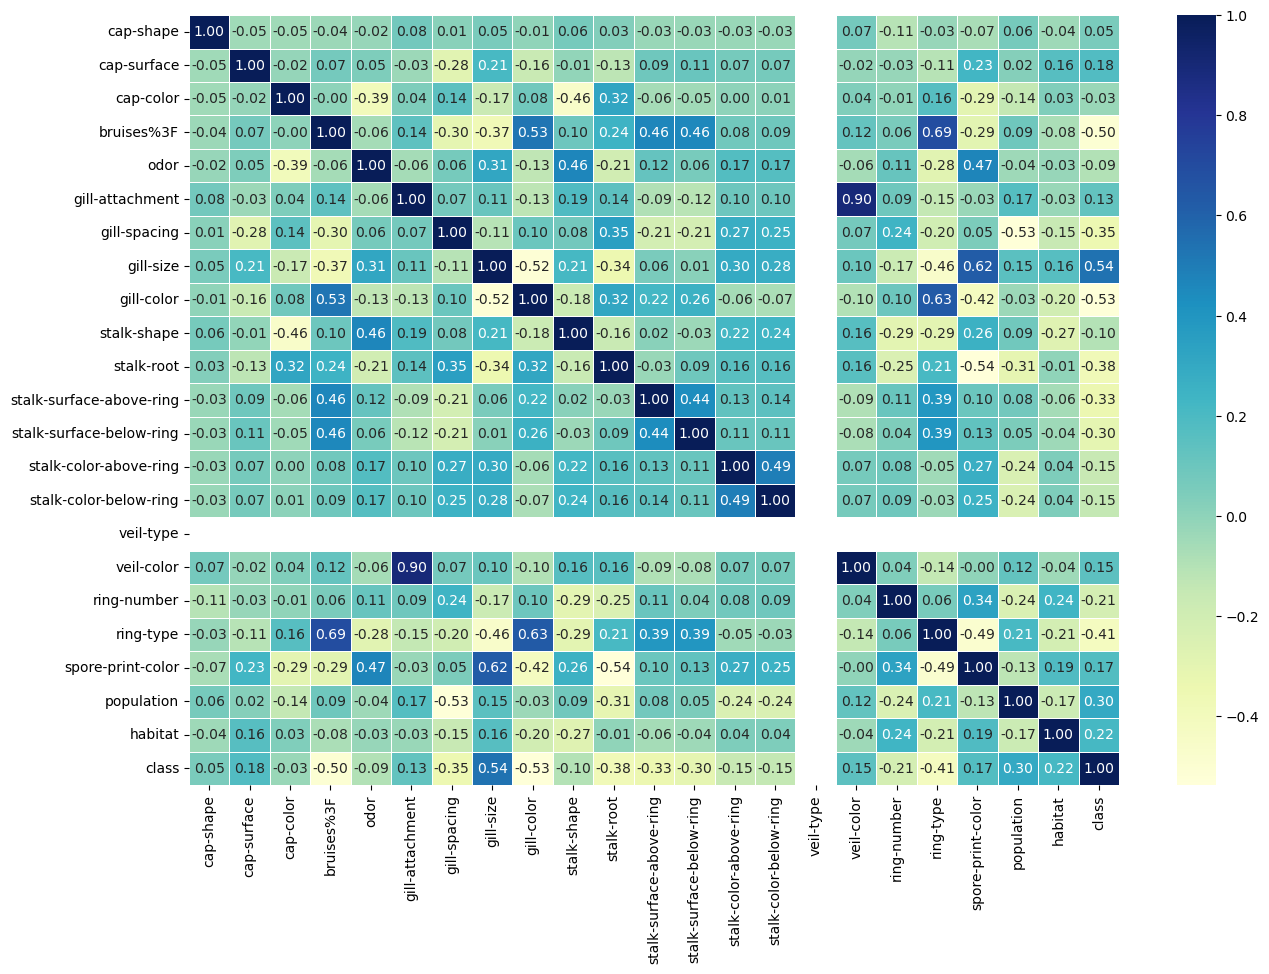

In [103]:
# Display correlation matrix graphically as a heatmap.
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths = 0.5, fmt=".2f", cmap="YlGnBu");

The strongest correlations are positive correlations between population(.30) and gill-size(.54). This means these features are good indicators of a poisonous mushroom. And negative correlations between bruises(-.50),gill-spacing(-.35), gill-color(-.53), stalk-root(-.38), stalk-surface-above-ring(-.33), stalk-surface-below-ring(-.30), and ring type(-.41). This means these are good indicators of an edible mushroom. 

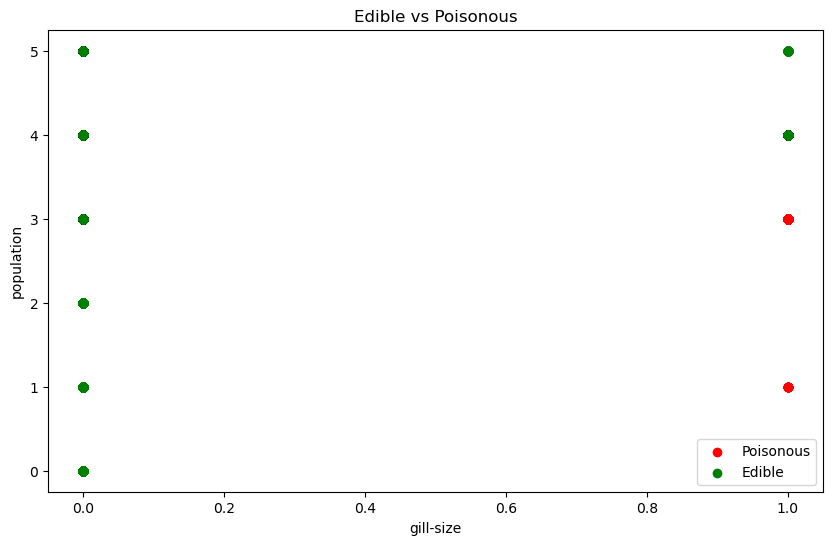

In [26]:
# Create another Figure
plt.figure(figsize=(10,6))

# Scatter for poisonous
plt.scatter(df["gill-size"][df["class"] == 1],
           df.population[df["class"] == 1],
           c="red");


# Scatter for edible
plt.scatter(df["gill-size"][df["class"] == 0],
           df.population[df["class"] == 0 ],
           c="green");


# Customize graph
plt.title("Edible vs Poisonous")
plt.xlabel("gill-size")
plt.ylabel("population")
plt.legend(["Poisonous", "Edible"]);

This graph shows that the smaller gill size is associated with the liklihood of a mushroom being safe to eat. If the gill-size is broad, rather than narrow, it seems almost certain that the mushroom is edible.

# Modeling

In [104]:
# Create a logistic Regression Model
# Increase max iterations to prevent error
myLog_model = linear_model.LogisticRegression( max_iter=6000 )
y = df["class"]
x = df.drop("class", axis=1)


In [105]:
# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [106]:
# Train the model
myLog_model.fit(x_train.values, y_train.values)

LogisticRegression(max_iter=6000)

In [107]:
# Store predictions from the test data
y_pred = myLog_model.predict(x_test.values);

In [108]:
# Show accuracy of predictions
print(metrics.accuracy_score(y_test, y_pred))

0.9464615384615385


In [109]:
# Display a confusion matrix to count the number of correct predictions
print(confusion_matrix(y_test, y_pred))

[[799  41]
 [ 46 739]]


This confusion matrix shows high accuracy of predictions with few false positives and false negatives. 


# User Interface
Below is an interface to enter the data collected from a mushroom and get a prediction on whether the mushroom is edible or poisonous. If the prediction is 0, the mushroom is edible, if the prediction is 1 then the mushroom is poisonous. 

In [110]:
# Creating user interface
cap_shape = int(input("Please enter a cap shape (0 = bell, 1 = conical, 2 = convex, 3 = flat, 4 = knobbed, 5 = sunken):"))
cap_surface = int(input("Please enter a cap surface (0 = fibrous, 1 = grooves, 2 = scaly, 3 = smooth):"))
cap_color = int(input("Please enter a cap color (0 = brown, 1 = buff, 2 = cinnamon, 3 = gray, 4 = green, 5 = pink, 6 = purple, 7 = red, 8 = white, 9 = yellow):"))
bruises = int(input("Please enter bruises information (0 = yes, 1 = no):"))
odor = int(input("Please enter odor (0 = almond, 1 = anise, 2 = creosote, 3 = fishy, 4 = foul, 5 = musty, 6 = none, 7 = pungent, 8 = spicy):"))
gill_attachment = int(input("Please enter gill-attachment (0 = attached, 1 = descending, 2 = free, 3 = notched):"))
gill_spacing = int(input("Please enter gill-spacing (0 = close, 1 = crowded, 2 = distant):"))
gill_size = int(input("Please enter gill-size (0 = broad, 1 = narrow):"))
gill_color = int(input("Please enter gill-color (0 = black, 1 = brown, 2 = buff, 3 = chocolate, 4 = gray, 5 = green, 6 = orange, 7 = pink, 8 = purple, 9 = red):"))
stalk_shape = int(input("Please enter stalk-shape (0 = enlarging, 1 = tapering):"))
stalk_root = int(input("Please enter stalk-root (0 = bulbous, 1 = club, 2 = cup, 3 = equal, 4 = rhizomorphs, 5 = rooted, 6 = missing):"))
stalk_surface_above_ring = int(input("Please enter stalk surface above ring (0 = fibrous, 1 = scaly, 2 = silky, 3 = smooth):"))
stalk_surface_below_ring = int(input("Please enter stalk surface below ring (0 = fibrous, 1 = scaly, 2 = silky, 3 = smooth):"))
stalk_color_above_ring = int(input("Please enter stalk color above ring (0 = brown, 1 = buff, 2 = cinnamon,3 = gray, 4 = orange, 5 = pink, 6 = red, 7 = white, 8 = yellow):"))
stalk_color_below_ring = int(input("Please enter stalk color above ring (0 = brown, 1 = buff, 2 = cinnamon,3 = gray, 4 = orange, 5 = pink, 6 = red, 7 = white, 8 = yellow):"))
veil_type = int(input("Please enter the veil type (0 = partial, 1 = universal):"))
veil_color = int(input("Please enter the veil color (0 = brown, 1 = orange, 2 = white, 3 = yellow):"))
ring_number = int(input("Please enter the ring number (0 = none, 1 = one, 2 = two):"))
ring_type = int(input("Please enter the ring type (0 = cobwebby, 1 = evanescent, 2 = flaring, 3 = large, 4 = none, 5 = pendant, 6 = sheathing, 7 = zone):"))
spore_print_color = int(input("Please enter the spore print color (0 = black, 1 = brown, 2 = buff, 3 = chocolate, 4 = green, 5 = orange, 6 = purple, 7 = white, 8 = yellow):"))
population = int(input("Please enter the population (0 = abundant, 1 = clustered, 2 = numerous, 3 = scattered, 4 = several, 5 = solitary):"))
habitat = int(input("Please enter the habitat (0 = grasses, 1 = leaves, 2 = meadows, 3 = paths, 4 = urban, 5 = waste, 6 = woods):"))

print(myLog_model.predict([[cap_shape, cap_surface, cap_color, bruises, odor, gill_attachment,
                           gill_spacing, gill_size, gill_color, stalk_shape,
                           stalk_root, stalk_surface_above_ring, stalk_surface_below_ring,
                           stalk_color_above_ring, stalk_color_below_ring,veil_type,
                           veil_color, ring_number, ring_type, spore_print_color,
                           population, habitat]]))


Please enter a cap shape (0 = bell, 1 = conical, 2 = convex, 3 = flat, 4 = knobbed, 5 = sunken): 0
Please enter a cap surface (0 = fibrous, 1 = grooves, 2 = scaly, 3 = smooth): 0
Please enter a cap color (0 = brown, 1 = buff, 2 = cinnamon, 3 = gray, 4 = green, 5 = pink, 6 = purple, 7 = red, 8 = white, 9 = yellow): 0
Please enter bruises information (0 = yes, 1 = no): 0
Please enter odor (0 = almond, 1 = anise, 2 = creosote, 3 = fishy, 4 = foul, 5 = musty, 6 = none, 7 = pungent, 8 = spicy): 0
Please enter gill-attachment (0 = attached, 1 = descending, 2 = free, 3 = notched): 0
Please enter gill-spacing (0 = close, 1 = crowded, 2 = distant): 0
Please enter gill-size (0 = broad, 1 = narrow): 0
Please enter gill-color (0 = black, 1 = brown, 2 = buff, 3 = chocolate, 4 = gray, 5 = green, 6 = orange, 7 = pink, 8 = purple, 9 = red): 0
Please enter stalk-shape (0 = enlarging, 1 = tapering): 0
Please enter stalk-root (0 = bulbous, 1 = club, 2 = cup, 3 = equal, 4 = rhizomorphs, 5 = rooted, 6 = mi

[0]
